# 数据读取
可以看到拿到的数据为csv格式，包括有
- dt 时间
- AverageTemperature 平均温度
- AverageTemperatureUncertainty 平均温度不确定性
- City 城市
- Country 国家
- Latitude 维度
- Longitude 经度

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = './data/2022_APMCM_C_Data.csv'

In [3]:
df1 = pd.read_csv(data_dir, encoding='gbk').drop('Unnamed: 0', axis=1)
df1.head()

,dt,AverageTemperature,City,Latitude,Longitude
0,1915,0.825,Montreal,45.8,72.6
1,1918,0.653,Montreal,45.8,72.6
2,1919,-0.458,Montreal,45.8,72.6
3,1921,0.111,Montreal,45.8,72.6
4,1922,0.423,Montreal,45.8,72.6


In [4]:
df1.tail()

,dt,AverageTemperature,City,Latitude,Longitude
4035187,2013,7.710,Zwolle,52.2,-5.2
4035188,2013,11.464,Zwolle,52.2,-5.2
4035189,2013,15.043,Zwolle,52.2,-5.2
4035190,2013,18.775,Zwolle,52.2,-5.2
4035191,2013,18.025,Zwolle,52.2,-5.2


In [5]:
df1.shape

(4035192, 5)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035192 entries, 0 to 4035191
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   dt                  int64  
 1   AverageTemperature  float64
 2   City                object 
 3   Latitude            float64
 4   Longitude           float64
dtypes: float64(3), int64(1), object(1)
memory usage: 153.9+ MB


In [7]:
raw_df = df1

In [8]:
df2 = pd.read_csv('./data/GlobalTem.csv')

In [9]:
raw_df = pd.concat([df1, df2])
raw_df

,dt,AverageTemperature,City,Latitude,Longitude,AverageTemperatureUncertainty,Country
0,1915,0.825,Montreal,45.8,72.6,NaN,NaN
1,1918,0.653,Montreal,45.8,72.6,NaN,NaN
2,1919,-0.458,Montreal,45.8,72.6,NaN,NaN
3,1921,0.111,Montreal,45.8,72.6,NaN,NaN
4,1922,0.423,Montreal,45.8,72.6,NaN,NaN
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,Zwolle,52.24N,5.26E,0.236,Netherlands
8599208,2013-06-01,15.043,Zwolle,52.24N,5.26E,0.261,Netherlands
8599209,2013-07-01,18.775,Zwolle,52.24N,5.26E,0.193,Netherlands
8599210,2013-08-01,18.025,Zwolle,52.24N,5.26E,0.298,Netherlands


In [10]:
raw_df.isnull().sum()

dt                                     0
AverageTemperature                364130
City                                   0
Latitude                               0
Longitude                              0
AverageTemperatureUncertainty    4399322
Country                          4035192
dtype: int64

In [11]:
raw_df.dropna(inplace=True)
raw_df

,dt,AverageTemperature,City,Latitude,Longitude,AverageTemperatureUncertainty,Country
0,1743-11-01,6.068,Århus,57.05N,10.33E,1.737,Denmark
5,1744-04-01,5.788,Århus,57.05N,10.33E,3.624,Denmark
6,1744-05-01,10.644,Århus,57.05N,10.33E,1.283,Denmark
7,1744-06-01,14.051,Århus,57.05N,10.33E,1.347,Denmark
8,1744-07-01,16.082,Århus,57.05N,10.33E,1.396,Denmark
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,Zwolle,52.24N,5.26E,0.182,Netherlands
8599207,2013-05-01,11.464,Zwolle,52.24N,5.26E,0.236,Netherlands
8599208,2013-06-01,15.043,Zwolle,52.24N,5.26E,0.261,Netherlands
8599209,2013-07-01,18.775,Zwolle,52.24N,5.26E,0.193,Netherlands


In [12]:
raw_df.drop_duplicates(keep='first', inplace=True)

In [13]:
raw_df.shape

(8235082, 7)

In [14]:
# 求温度的期望
mean_temp = raw_df['AverageTemperature'].mean()

In [15]:
# 选出一些比较小的数据
df = raw_df.loc[np.absolute(raw_df['AverageTemperature']) <= 0.05 * mean_temp]
print(df.shape)
# 先取出这些数据
raw_df.drop(df.index.to_numpy(), inplace=True)
# 228175 - 3758 = 224417, 剩下了224417条数据

(150154, 7)


In [16]:
df.reset_index(inplace=True, drop=True)
raw_df.reset_index(inplace=True, drop=True)
df

,dt,AverageTemperature,City,Latitude,Longitude,AverageTemperatureUncertainty,Country
0,1744-12-01,0.122,Århus,57.05N,10.33E,1.756,Denmark
1,1745-03-01,0.129,Århus,57.05N,10.33E,1.088,Denmark
2,1750-12-01,-0.678,Århus,57.05N,10.33E,1.808,Denmark
3,1751-01-01,-0.623,Århus,57.05N,10.33E,1.700,Denmark
4,1752-01-01,-0.781,Århus,57.05N,10.33E,2.622,Denmark
...,...,...,...,...,...,...,...
150149,1996-01-01,-0.569,Zwolle,52.24N,5.26E,0.239,Netherlands
150150,1996-02-01,0.007,Zwolle,52.24N,5.26E,0.284,Netherlands
150151,1996-12-01,-0.030,Zwolle,52.24N,5.26E,0.151,Netherlands
150152,2009-01-01,0.520,Zwolle,52.24N,5.26E,0.293,Netherlands


In [17]:
raw_df.shape

(8084928, 7)

下面使用相对不确定度筛选信息

In [18]:
Rela_uncertain = raw_df["AverageTemperatureUncertainty"] / raw_df["AverageTemperature"]
Rela_uncertain[np.isinf] = np.nan
raw_df["Rela_uncertain"] = Rela_uncertain

In [19]:
raw_df.loc[raw_df['Rela_uncertain'] == raw_df['Rela_uncertain'].max()]

,dt,AverageTemperature,City,Latitude,Longitude,AverageTemperatureUncertainty,Country,Rela_uncertain
3934279,1768-01-01,0.853,Le Mans,47.42N,1.18E,12.712,France,14.902696
5172176,1768-01-01,0.853,Orléans,47.42N,1.18E,12.712,France,14.902696
7261818,1768-01-01,0.853,Tours,47.42N,1.18E,12.712,France,14.902696


In [20]:
raw_df.loc[raw_df['Rela_uncertain'] == raw_df['Rela_uncertain'].min()]

,dt,AverageTemperature,City,Latitude,Longitude,AverageTemperatureUncertainty,Country,Rela_uncertain
2504773,1768-01-01,-0.957,Groningen,53.84N,6.82E,14.326,Netherlands,-14.969697


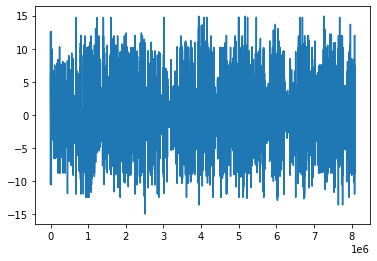

In [21]:
Rela_uncertain.dropna(inplace=True)
Rela_uncertain.to_numpy()
x = np.arange(len(Rela_uncertain))
plt.figure()
plt.plot(x, Rela_uncertain)

In [22]:
Rela_uncertain = pd.DataFrame(Rela_uncertain)
raw_df.drop(Rela_uncertain[np.absolute(Rela_uncertain[0])>0.05].index.to_numpy(), inplace=True)
raw_df

,dt,AverageTemperature,City,Latitude,Longitude,AverageTemperatureUncertainty,Country,Rela_uncertain
18,1750-08-01,16.848,Århus,57.05N,10.33E,0.736,Denmark,0.043685
26,1751-08-01,16.547,Århus,57.05N,10.33E,0.728,Denmark,0.043996
27,1751-09-01,12.177,Århus,57.05N,10.33E,0.582,Denmark,0.047795
825,1825-06-01,14.699,Århus,57.05N,10.33E,0.618,Denmark,0.042044
1024,1843-09-01,13.146,Århus,57.05N,10.33E,0.415,Denmark,0.031569
...,...,...,...,...,...,...,...,...
8084923,2013-04-01,7.710,Zwolle,52.24N,5.26E,0.182,Netherlands,0.023606
8084924,2013-05-01,11.464,Zwolle,52.24N,5.26E,0.236,Netherlands,0.020586
8084925,2013-06-01,15.043,Zwolle,52.24N,5.26E,0.261,Netherlands,0.017350
8084926,2013-07-01,18.775,Zwolle,52.24N,5.26E,0.193,Netherlands,0.010280


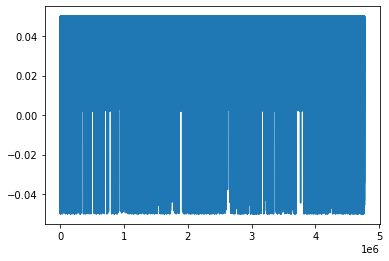

In [23]:
y = raw_df['Rela_uncertain'].to_numpy()
x = np.arange(len(y))
plt.figure()
plt.plot(x, y)

In [24]:
df = pd.concat([df, raw_df.drop('Rela_uncertain', axis=1).reset_index(drop=True)])

In [25]:
indexs = df[df['dt']<='1900-1-1'].index.to_numpy()
df.drop(indexs, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,dt,AverageTemperature,City,Latitude,Longitude,AverageTemperatureUncertainty,Country
0,1907-02-01,-0.337,Århus,57.05N,10.33E,0.495,Denmark
1,1907-12-01,0.460,Århus,57.05N,10.33E,0.481,Denmark
2,1909-01-01,0.779,Århus,57.05N,10.33E,0.595,Denmark
3,1909-03-01,-0.476,Århus,57.05N,10.33E,0.230,Denmark
4,1910-01-01,0.763,Århus,57.05N,10.33E,0.502,Denmark
...,...,...,...,...,...,...,...
3924095,2013-04-01,7.710,Zwolle,52.24N,5.26E,0.182,Netherlands
3924096,2013-05-01,11.464,Zwolle,52.24N,5.26E,0.236,Netherlands
3924097,2013-06-01,15.043,Zwolle,52.24N,5.26E,0.261,Netherlands
3924098,2013-07-01,18.775,Zwolle,52.24N,5.26E,0.193,Netherlands


In [26]:
year = []
years = df['dt'].to_numpy()
for i, x in enumerate(years):
    year.append(x[:4])
df['dt'] = year
df.drop(['AverageTemperatureUncertainty', 'Country'],  axis=1, inplace=True)
df

,dt,AverageTemperature,City,Latitude,Longitude
0,1907,-0.337,Århus,57.05N,10.33E
1,1907,0.460,Århus,57.05N,10.33E
2,1909,0.779,Århus,57.05N,10.33E
3,1909,-0.476,Århus,57.05N,10.33E
4,1910,0.763,Århus,57.05N,10.33E
...,...,...,...,...,...
3924095,2013,7.710,Zwolle,52.24N,5.26E
3924096,2013,11.464,Zwolle,52.24N,5.26E
3924097,2013,15.043,Zwolle,52.24N,5.26E
3924098,2013,18.775,Zwolle,52.24N,5.26E


In [27]:
res1 = []
res2 = []
lat = df['Latitude'].to_numpy()
lot = df['Longitude'].to_numpy()
for i, sample in enumerate(lat):
    if sample[-1] == 'N':
        res1.append(float(sample[:-2]))
    else:
        res1.append(-float(sample[:-2]))
for i, sample in enumerate(lot):
    if sample[-1] == 'W':
        res2.append(-float(sample[:-2]))
    else:
        res2.append(float(sample[:-2]))

res1 = np.array(res1)
res2 = np.array(res2)

df['Latitude'] = res1
df['Longitude'] = res2
df


,dt,AverageTemperature,City,Latitude,Longitude
0,1907,-0.337,Århus,57.0,10.3
1,1907,0.460,Århus,57.0,10.3
2,1909,0.779,Århus,57.0,10.3
3,1909,-0.476,Århus,57.0,10.3
4,1910,0.763,Århus,57.0,10.3
...,...,...,...,...,...
3924095,2013,7.710,Zwolle,52.2,5.2
3924096,2013,11.464,Zwolle,52.2,5.2
3924097,2013,15.043,Zwolle,52.2,5.2
3924098,2013,18.775,Zwolle,52.2,5.2


In [28]:
df.to_csv('./data/all_df.csv')

In [29]:
years = df['dt'].unique()
years.sort()

In [30]:
GLOBAL_MEAN_T = []

for i, year in enumerate(years):
    this_year = df[df['dt'] == year]
    mean_temp = this_year['AverageTemperature'].mean()
    GLOBAL_MEAN_T.append(mean_temp)

GLOBAL_MEAN_T = np.array(GLOBAL_MEAN_T)

In [31]:
global_data = pd.DataFrame(columns=['dt', 'mean_temp'])
global_data['dt'] = years
global_data['mean_temp'] = GLOBAL_MEAN_T
global_data

,dt,mean_temp
0,1900,20.571300
1,1901,21.928121
2,1902,21.360850
3,1903,21.650719
4,1904,21.196928
...,...,...
109,2009,20.373753
110,2010,20.390901
111,2011,20.387350
112,2012,20.834057


In [32]:
global_data.to_csv('./data/global_data.csv')

In [33]:
NORTH_MEAN_T = []

for i, year in enumerate(years):
    df_ = df.loc[df['Latitude']>=23.5]
    df_ = df_.loc[df['Latitude']<=66.5]
    this_year = df_[df_['dt'] == year]
    mean_temp = this_year['AverageTemperature'].mean()
    NORTH_MEAN_T.append(mean_temp)

NORTH_MEAN_T = np.array(NORTH_MEAN_T)

In [34]:
north_data = pd.DataFrame(columns=['dt', 'mean_temp'])
north_data['dt'] = years
north_data['mean_temp'] = NORTH_MEAN_T
north_data

,dt,mean_temp
0,1900,14.862660
1,1901,19.045613
2,1902,18.036808
3,1903,18.679918
4,1904,18.125519
...,...,...
109,2009,16.435496
110,2010,16.419549
111,2011,16.646698
112,2012,17.163521


In [35]:
north_data.to_csv('./data/north_data.csv')

In [36]:
SORTH_MEAN_T = []

for i, year in enumerate(years):
    df_ = df.loc[df['Latitude']<=-23.5]
    df_ = df_.loc[df['Latitude']>=-66.5]
    this_year = df_[df_['dt'] == year]
    mean_temp = this_year['AverageTemperature'].mean()
    SORTH_MEAN_T.append(mean_temp)

SORTH_MEAN_T = np.array(SORTH_MEAN_T)

In [37]:
sorth_data = pd.DataFrame(columns=['dt', 'mean_temp'])
sorth_data['dt'] = years
sorth_data['mean_temp'] = SORTH_MEAN_T
sorth_data

,dt,mean_temp
0,1900,19.635474
1,1901,18.523207
2,1902,18.428517
3,1903,18.586695
4,1904,18.012723
...,...,...
109,2009,17.852650
110,2010,17.868495
111,2011,17.926558
112,2012,18.580291


In [38]:
sorth_data.to_csv('./data/sorth_data.csv')

In [39]:
HOT_MEAN_T = []

for i, year in enumerate(years):
    df_ = df.loc[df['Latitude']>-23.5]
    df_ = df_.loc[df['Latitude']<23.5]
    this_year = df_[df_['dt'] == year]
    mean_temp = this_year['AverageTemperature'].mean()
    HOT_MEAN_T.append(mean_temp)

HOT_MEAN_T = np.array(HOT_MEAN_T)

In [40]:
hot_data = pd.DataFrame(columns=['dt', 'mean_temp'])
hot_data['dt'] = years
hot_data['mean_temp'] = HOT_MEAN_T
hot_data

,dt,mean_temp
0,1900,24.270897
1,1901,25.175463
2,1902,24.984600
3,1903,24.789603
4,1904,24.675379
...,...,...
109,2009,25.474239
110,2010,25.522043
111,2011,25.125869
112,2012,25.394088


In [41]:
hot_data.to_csv('./data/hot_data.csv')

下面统计一下都有哪些城市的数据

In [42]:
COL_NAMES = ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country','Latitude', 'Longitude', 'Rela_uncertain']